Praktikum 6 | Pengolahan Citra
Inversi, Transformasi Logaritmik, Transformasi Powerlaw

In [37]:
#Import Library
import numpy as np #Import library NumPy untuk operasi array
import imageio #Import library ImageIO untuk membaca dan menulis gambar
import matplotlib.pyplot as plt #Import library Matplotlib untuk plotting

In [38]:
#Membaca Gambar
img = imageio.imread("Gambar1.jpg")  #Membaca gambar dan menyimpannya ke variabel img menggunakan modul imageio
img_height = img.shape[0] #Mendapatkan tinggi gambar (jumlah piksel dalam dimensi vertikal) dan menyimpannya ke variabel img_height
img_width = img.shape[1] #Mendapatkan lebar gambar (jumlah piksel dalam dimensi horizontal) dan menyimpannya ke variabel img_width
img_channel = img.shape[2] #Mendapatkan jumlah saluran warna pada gambar dan menyimpannya ke variabel img_channel

C:\Users\Ichsan Nur Rachmad Y\AppData\Local\Temp\ipykernel_23252\4230822666.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("Gambar1.jpg")  #Membaca gambar dan menyimpannya ke variabel img menggunakan modul imageio


Inversi

In [39]:
#Membuat variabel img_inversi
img_inversi = np.zeros(img.shape, dtype=np.uint8) #Membuat matriks dengan ukuran yang sama dengan matriks gambar yang sedang diolah, dengan tipe data unsigned integer 8-bit

In [40]:
#Membuat fungsi untuk inversi grayscale
def inversi_grayscale(nilai): #Looping untuk setiap piksel pada gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0] #Ambil nilai komponen warna (R, G, B) dari piksel
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3 #Hitung nilai grayscale dari piksel
            gray = nilai - gray #Lakukan inversi grayscale
            img_inversi[y][x] = (gray, gray, gray) #Menyimpan nilai inversi grayscale pada matriks img_inversi

In [41]:
#Membuat fungsi untuk inversi rgb
def inversi_rgb(nilai): 
    for y in range(0, img_height): #Looping untuk setiap piksel pada gambar
        for x in range(0, img_width):
            #Ambil nilai komponen warna (R, G, B) dari piksel
            red = img[y][x][0] 
            green = img[y][x][1]
            blue = img[y][x][2]
            #Lakukan inversi pada masing-masing komponen warna
            red = nilai - red
            green = nilai - green
            blue = nilai - blue
            #Simpan nilai inversi pada matriks img_inversi
            img_inversi[y][x] = (red, green, blue)

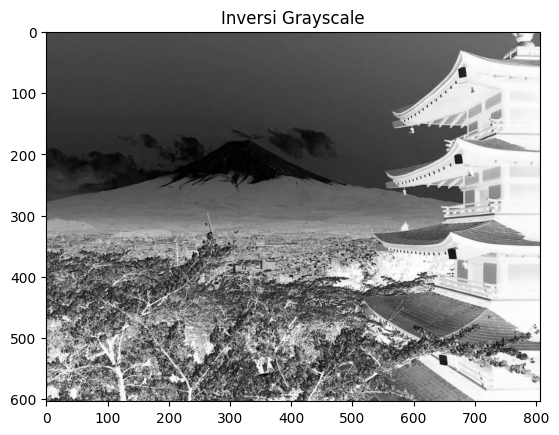

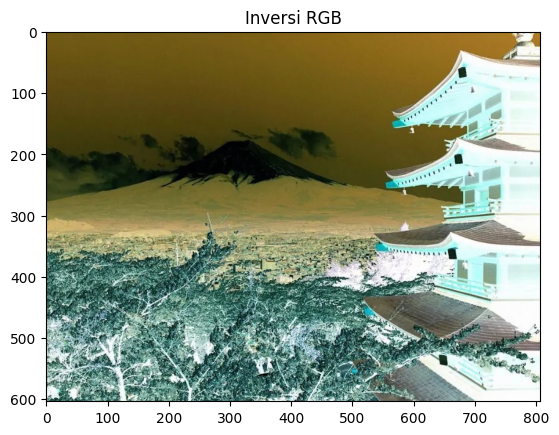

In [42]:
#Menampilkan hasil inversi
inversi_grayscale(255) #Memanggil fungsi inversi_grayscale dengan nilai maksimum 255
plt.imshow(img_inversi) #Menampilkan gambar hasil inversi grayscale menggunakan matplotlib
plt.title("Inversi Grayscale")
plt.show()

inversi_rgb(255) #Memanggil fungsi inversi_rgb dengan nilai maksimum 255
plt.imshow(img_inversi) #Menampilkan gambar hasil inversi RGB menggunakan matplotlib
plt.title("Inversi RGB")
plt.show()

Log

In [43]:
#Membuat variabel img_log untuk menampung hasil
img_log = np.zeros(img.shape, dtype=np.uint8) #Membuat matriks kosong dengan ukuran yang sama dengan gambar asli

In [44]:
#Mendefinisikan fungsi untuk log
def log(c): #Membuat fungsi 'log' dengan satu parameter 'c'
    for y in range(0, img_height): #Looping sepanjang tinggi citra (y) dan lebar citra (x)
        for x in range(0, img_width):
            red = img[y][x][0] # Nilai intensitas dari setiap komponen warna pada titik (x, y)
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3 #Menghitung nilai rata-rata intensitas keabuan dari ketiga komponen warna
            gray = int(c * np.log(gray + 1)) #Menerapkan transformasi logaritmik pada nilai keabuan
            if gray > 255: #Batasi nilai keabuan agar tidak melebihi rentang 0-255
                gray = 255
            if gray < 0:
                gray = 0
            img_log[y][x] = (gray, gray, gray) #Memasukkan nilai keabuan yang telah diolah ke dalam matriks citra yang baru

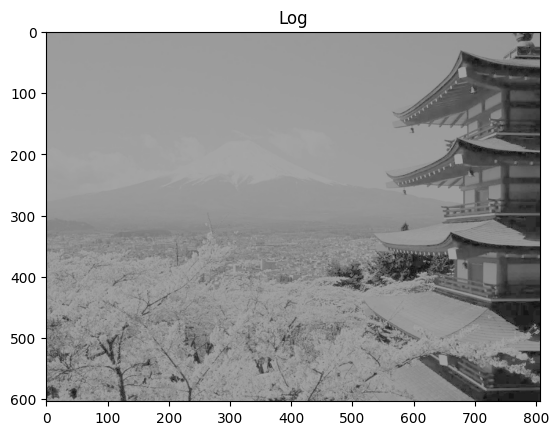

In [45]:
#Menampilkan hasil log
log(30)
plt.imshow(img_log) #Menampilkan gambar atau array dalam plot.
plt.title("Log") #Menambahkan judul pada plot yang akan ditampilkan dengan menggunakan fungsi title() dari pustaka Matplotlib.
plt.show() #Menampilkan plot yang telah dibuat dengan menggunakan fungsi show() dari pustaka Matplotlib.

Inversi & Log

In [46]:
#Membuat variabel img_inlog untuk menampung hasil
img_inlog = np.zeros(img.shape, dtype=np.uint8)  #Membuat array numpy baru img_inlog dengan ukuran yang sama seperti array img dan tipe data uint8. Array img_inlog diisi dengan nilai 0 untuk setiap elemennya.

In [47]:
#Mendefinisikan fungsi untuk inversi log
def inlog(c):  #Membuat fungsi 'inlog' dengan satu parameter 'c'
    for y in range(0, img_height):  #Melakukan iterasi untuk setiap nilai y dalam kisaran (0, img_height)
        for x in range(0, img_width):  #Melakukan iterasi untuk setiap nilai x dalam kisaran (0, img_width)
            red = img[y][x][0]  #Mengambil nilai komponen merah dari piksel pada koordinat (y,x)
            green = img[y][x][1]  #Mengambil nilai komponen hijau dari piksel pada koordinat (y,x)
            blue = img[y][x][2]  #Mengambil nilai komponen biru dari piksel pada koordinat (y,x)
            gray = (int(red) + int(green) + int(blue)) / 3  #Menghitung nilai keabuan dengan rumus rata-rata
            gray = int(c * np.log(255 - gray + 1))  #Mengaplikasikan rumus transformasi logaritmik pada nilai keabuan
            if gray > 255:  #Memastikan nilai keabuan tidak melebihi 255
                gray = 255
            if gray < 0:  #Memastikan nilai keabuan tidak kurang dari 0
                gray = 0
            img_inlog[y][x] = (gray, gray, gray)  #Menetapkan nilai keabuan yang telah diubah ke piksel pada koordinat (y,x)

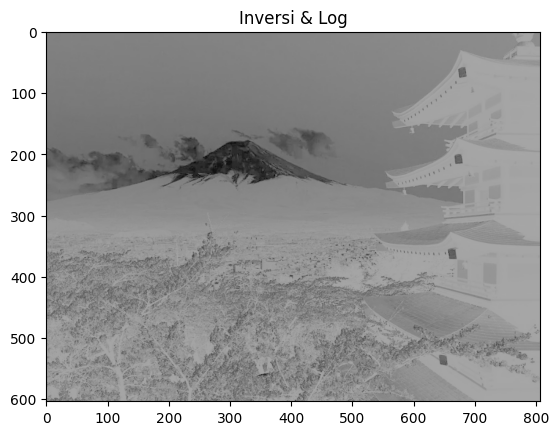

In [48]:
#Menampilkan hasil inversi log
inlog(30) #Mengaplikasikan fungsi inlog dengan parameter c = 30
plt.imshow(img_inlog)  #Menampilkan citra hasil inversi dan log
plt.title("Inversi & Log") #Memberikan judul pada citra
plt.show() #Menampilkan citra

Nth Power

In [49]:
#Membuat variabel img_nthpower untuk menampung hasil
img_nthpower = np.zeros(img.shape, dtype=np.uint8) #Membuat array dengan nilai nol berukuran sama dengan citra `img` dan tipe data `uint8` menggunakan NumPy.

In [50]:
#Mendefinisikan fungsi untuk nth power
def nthpower(c, y):
    thc = c / 100 #Menghitung persentase nilai c dan y
    thy = y / 100
    for y in range(0, img_height): #Looping setiap pixel pada gambar
        for x in range(0, img_width):
            red = img[y][x][0] #Mendapatkan nilai RGB dari setiap pixel
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3 #Menghitung nilai gray sebagai rata-rata dari nilai RGB
            gray = int(thc * pow(gray, thy)) #Menghitung nilai gray yang baru menggunakan fungsi nth power
            if gray > 255: #Memastikan nilai gray tidak melebihi 255 atau kurang dari 0
                gray = 255
            if gray < 0:
                gray = 0
            img_nthpower[y][x] = (gray, gray, gray) #Memasukkan nilai gray ke dalam array img_nthpower

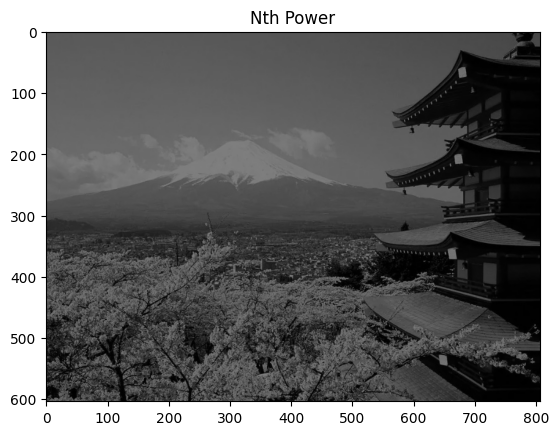

In [51]:
#Menampilkan hasil
nthpower(50, 100) #Melakukan fungsi nthpower dengan parameter c = 50 dan y = 100
plt.imshow(img_nthpower) #Menampilkan gambar hasil proses nthpower
plt.title("Nth Power") #Memberi judul pada gambar
plt.show() #Menampilkan gambar yang sudah diberi judul

Nth Root Power

In [52]:
#Membuat variabel img_nthrootpower 
img_nthrootpower = np.zeros(img.shape, dtype=np.uint8) #Membuat array dengan nilai nol berukuran sama dengan citra `img` dan tipe data `uint8` menggunakan NumPy.

In [53]:
#Membuat fungsi untuk nth root power
def nthrootpower(c, y):
    thc = c / 100 #Menghitung persentase nilai c dan y
    thy = y / 100
    for y in range(0, img_height): #Looping setiap pixel pada gambar
        for x in range(0, img_width):
            red = img[y][x][0] #Mendapatkan nilai RGB dari setiap pixel
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3 #Menghitung nilai gray sebagai rata-rata dari nilai RGB
            gray = int(thc * pow(gray, 1./thy)) #Menghitung nilai gray yang baru menggunakan fungsi nth root power
            if gray > 255: #Memastikan nilai gray tidak melebihi 255 atau kurang dari 0
                gray = 255
            if gray < 0:
                gray = 0
            img_nthpower[y][x] = (gray, gray, gray) #Memasukkan nilai gray ke dalam array img_nthpower

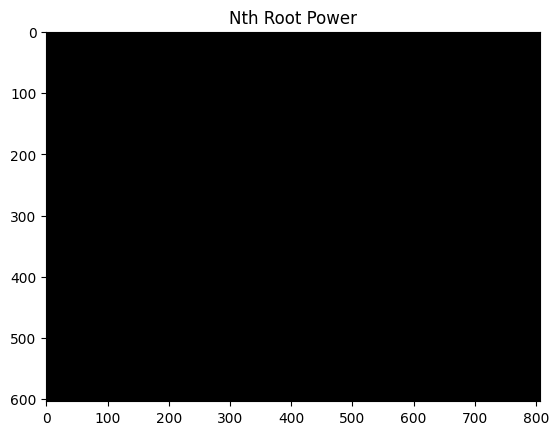

In [54]:
#Menampilkan hasil
nthrootpower(50, 100) #Melakukan fungsi nthrootpower dengan parameter c = 50 dan y = 100
plt.imshow(img_nthrootpower) #Menampilkan gambar hasil proses nthrootpower
plt.title("Nth Root Power") #Memberi judul pada gambar
plt.show() #Menampilkan gambar yang sudah diberi judul